# `clust-learn` - Module 4: Classifier 分类

This guide shows how to use the `classifier` module of the `clust-learn` package to fit a classification model to further explain the clustres previously obtained.

本指南展示了如何使用clust-learn包中的classifier模块来拟合一个分类模型，以进一步解释之前获得的聚类。

Note this module can also be used independently to fit a classification model for data that is not necessarily the output of clustering.

注意，这个模块也可以独立使用，用于拟合一个分类模型，数据不一定是聚类的输出。

## 0. Setup

In [1]:
import numpy as np
import pandas as pd

from clearn.classifier import Classifier

pd.set_option('display.max_columns', None)

d:\Anaconda\envs\xai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Data loading

Original dataset with corresponding cluster labels.

包含相应聚类标签的原始数据集。

In [2]:
df = pd.read_csv('data_TWN/data_台湾_modified_preprocessed_clustered_output.csv')
df.head()

,ASDAGE,ASRREA,ASRLIT,ASRINF,ASRIIE,ASRRSI,ASBGSEC,ASBGSSB,ASBGSB,ASBGERL,ASBGDRL,ASBGSLR,ASBGSCR,ASBGHRL,ASBHSES,ASBHELA,ASBHENA,ASBHELN,ASBHELT,ASBHPCS,ASBHPLR,ACBG09,ACBG15,ACBG16,ACBGRRS,ACBGEAS,ACBGDAS,ACDGTIHY,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY,ITSEX,ASRIBM,ASBG03,ASBG05A,ASBG05B,ASBG05E,ASBG05F,ASBG05G,ASBG05H,ASBG05I,ASBG06,ASBG07A,ASBG07B,ASBG08A,ASBG08B,ASBG10F,ASBR03A,ASBR03B,ASBR03C,ASBR04,ASBR05,ASDGSEC,ASDGSSB,ASDGSB,ASDGERL,ASDGDRL,ASDGSLR,ASDGSCR,ASDG05S,ASBH02A,ASBH02B,ASBH03A,ASBH03B,ASBH03C,ASBH03D,ASBH03E,ASBH03F,ASBH04,ASBH06,ASBH07F,ASBH09,ASBH14A,ASBH14B,ASBH14C,ASBH16,ASBH18AA,ASBH18AB,ASBH18BA,ASBH18BB,ASBH18CA,ASBH18CB,ASBH18DA,ASBH18DB,ASBH18EA,ASBH18EB,ASBH18FA,ASBH18FB,ASBH19,ASBH20A,ASBH20B,ASBH20C,ASBH21A,ASBH21B,ASBH21C,ASBH21D,ASBH22,ASDGHRL,ASDHSES,ASDHELA,ASDHENA,ASDHELN,ASDHELT,ASDHPCS,ASDHPLR,ASDHAPS,ASDHEDUP,ASDHOCCP,ACBG04,ACBG05A,ACBG05B,ACBG07A,ACBG07B,ACBG07C,ACBG08,ACBG13,ACBG14C,ACBG14D,ACBG14E,ACBG14F,ACBG14G,ACBG14H,ACBG14I,ACBG14J,ACBG14K,ACBG14L,ACBG14M,ACBG14N,ACBG17,ACBG18A,ACBG18B,ACBG18C,ACBG19,ACBG20,ACBG21A,ACBG21B,ACBG21C,ACBG21D,ACBG21E,ACBG21F,ACDGRRS,ACDGEAS,ACDGDAS,ACDGSBC,ATBG02,ATBG03,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATDGEAS,ATDGSOS,ATDGTJS,ATDGSLI,cluster,cluster_cat
0,10.42,606.734006,579.037538,601.993356,630.042040,612.745424,10.12086,8.64972,7.90321,10.66007,8.31437,7.86575,7.19857,11.28642,13.04932,10.26741,13.20593,11.47732,12.12899,10.83953,9.84880,152.0,9.0,5.0,8.99854,9.72437,12.9615,773.33333,30.0,25.0,25.0,3.0,5.0,8.24023,7.52665,3.83998,9.1022,233.33333,166.66667,2,4,1,1,1,2,1,2,1,1,5,2,3,1,1,1,3,3,2,3,1,2,2,2,1,2,3,3,3,1,1,1,1,2,2,2,2,1,3,1,4,1,1,1,6,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,1,2,1,1,1,1,2,4,1,1,1,1,1,1,2,1,1,2,1,1,1,2,2,2,2,3,3,3,4,4,3,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,1,5,1,2,1,2,2,2,3,3,3,3,2,2,3,2,2,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,2,2,2,2,2,2,3,2,1,2,3,3,3,3,3,4,3,3,1,4,2,3,2,2,1,3,2,2,2,3,1,3,2,2,1,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,3,3,3,3,3,2,4,3,3,1,3,4,1,1,1,3,4,1,1,1,1,1,1,1,2,3,3,2,3,2,0,STU_0
1,10.42,518.903994,506.704884,547.315564,516.584088,540.611226,8.55821,10.82106,8.93357,10.66007,9.89746,9.38515,7.84162,10.89263,10.72985,8.05673,12.25036,9.88273,8.72843,7.35062,7.40977,152.0,9.0,5.0,8.99854,9.72437,12.9615,773.33333,30.0,25.0,25.0,3.0,5.0,8.24023,7.52665,3.83998,9.1022,233.33333,166.66667,2,3,3,1,1,2,1,2,2,1,1,2,4,1,1,1,4,2,2,4,1,2,1,2,1,2,2,3,2,1,1,1,1,1,2,1,2,1,2,2,2,1,1,1,5,1,1,1,1,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,1,2,3,2,3,3,1,1,1,1,1,1,2,1,1,2,1,1,1,2,2,2,2,3,3,3,4,4,3,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,1,5,1,2,1,2,2,2,3,3,3,3,2,2,3,2,2,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,2,2,2,2,2,2,3,2,1,2,3,3,3,3,3,4,3,3,1,4,2,3,2,2,1,3,2,2,2,3,1,3,2,2,1,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,3,3,3,3,3,2,4,3,3,1,3,4,1,1,1,3,4,1,1,1,1,1,1,1,2,3,3,2,3,2,5,STU_5
2,10.17,548.327932,572.648294,582.075742,555.881454,563.427634,8.34208,8.64972,12.56749,8.05152,9.42264,8.40525,8.72693,9.60729,9.99175,7.61837,9.62426,8.57506,9.42233,10.10603,7.8

In [3]:
# 一共有多少类别
print("一共有多少类别:\n", df['cluster'].value_counts())

一共有多少类别:
 cluster
2    284
4    258
0    253
5    252
3    209
1    127
6     62
Name: count, dtype: int64


Lower dimensional dataset with corresponding cluster labels.

包含相应聚类标签的降维数据集。


In [4]:
df_red = pd.read_csv('data_TWN/data_台湾_modified_preprocessed_dim_red_clustered_output.csv')
df_red.head()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21,dim_22,dim_23,cluster,cluster_cat
0,1.353964,2.512822,-0.893179,-0.283769,0.431213,-1.663834,0.827444,0.988322,1.153092,-0.450197,0.100004,-0.358223,-0.089788,-0.207405,-0.025817,-0.097345,-0.072034,-0.046637,0.034232,-0.332346,0.165788,-0.117011,0.069989,0,STU_0
1,-1.732736,-0.160142,0.179386,-0.372626,0.479891,-1.745686,0.079351,0.767785,0.947252,0.147107,0.107631,-0.362164,-0.132899,-0.179959,-0.032163,-0.098702,-0.044397,-0.044450,0.046600,-0.306812,0.094654,-0.067244,0.090516,5,STU_5
2,-0.119628,-0.969051,-0.790797,-0.451957,0.554282,-1.620367,-0.929028,0.661320,0.998906,0.618085,0.100368,-0.366950,-0.098350,-0.181637,-0.027381,-0.086675,-0.026765,-0.074067,0.022596,-0.283247,0.099383,-0.095392,0.102322,3,STU_3
3,2.220523,-1.299200,-0.724042,-0.411452,0.458316,-1.693856,-1.508871,0.886695,1.038181,-0.000239,0.095429,-0.384116,-0.130077,-0.140069,-0.014616,-0.084568,0.008665,-0.043464,-0.000530,-0.271584,0.082460,-0.086349,0.105653,3,STU_3
4,-5.840337,1.012212,-2.083512,-0.453428,0.562080,-1.754664,-0.378245,0.586826,1.102778,0.871091,0.094333,-0.392346,-0.143097,-0.143320,0.004065,-0.097274,-0.017648,-0.050828,-0.006310,-0.293543,0.078018,-0.061619,0.106495,5,STU_5


In [5]:
# 一共有多少类别
print("一共有多少类别:\n", df_red['cluster'].value_counts())

一共有多少类别:
 cluster
2    284
4    258
0    253
5    252
3    209
1    127
6     62
Name: count, dtype: int64


## 2. Classification using extracted components from dimensionality reduction as predictors

使用降维技术提取的成分作为预测变量进行分类

### 2.1. Class instantiation and model fitting 类实例化和模型拟合

In [6]:
# 使用降维后的数据初始化分类器。
# 参数：
# df_red：降维后的数据集。
# list(df_red.columns[:-2])：使用数据集中除最后两列以外的所有列作为特征。
# df_red['cluster']：目标变量（聚类标签）。
# num_cols：指定数值特征。

classifier = Classifier(df_red, list(df_red.columns[:-2]),  df_red['cluster'], num_cols=list(df_red.columns[:-2]))

In [7]:
np.random.seed(42)

In [8]:
# 训练分类模型，并进行超参数调优。
# 参数：
# hyperparameter_tuning=True：启用超参数调优。
# param_grid：指定超参数搜索空间，包括：
# n_estimators：树的数量。
# eta：学习率。
# max_depth：树的最大深度。

classifier.train_model(hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7, 9]))

2025-04-28 04:51:25 INFO     clearn.classifier.classifier: Running feature selection...
2025-04-28 04:51:39 INFO     clearn.classifier.classifier: Running hyperparameter tuning...
2025-04-28 04:51:45 INFO     clearn.classifier.classifier: Training model...
2025-04-28 04:51:45 INFO     clearn.classifier.classifier: DONE!


### 模型性能评估

In [9]:
# 查看模型中每个特征的重要性。
classifier.feature_importances

,variable_name,shap_importance
0,dim_01,1.106657
1,dim_02,0.676914
2,dim_04,0.672296
3,dim_09,0.532459
4,dim_05,0.477632
5,dim_07,0.419258
6,dim_03,0.339350
7,dim_06,0.217903
8,dim_17,0.102881
9,dim_21,0.093931


In [10]:
# 查看经过特征选择后保留的特征数量。
len(classifier.filtered_features_)

19

### 2.2. Model performance 模型性能 超参数调优结果

In [11]:
# 查看超参数调优的结果，包括最佳参数和对应的性能指标。
classifier.hyperparameter_tuning_metrics()

XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.868513   
1                           0.15         3           60            0.874558   
2                           0.15         5           30            0.867642   
3                           0.15         5           60            0.866774   
4                           0.15         7           30            0.869365   
5                           0.15         7           60            0.875426   
6                           0.15         9           30            0.867642   
7                           0.15         9           60            0.881484   
8                           0.25         3           30            0.870231   
9                           0.25         3           60            0.877146   
10                          0.25         5           30            0.874560   
11                          0.25         5           60            0.884077   
12                          0.25         7           30            0.881486   
13                          0.25         7           60            0.886672   
14                          0.25         9           30            0.880616   
15                          0.25         9           60            0.884075   

                   
   std_test_score  
0        0.005321  
1        0.008167  
2        0.013288  
3        0.010551  
4        0.017865  
5        0.012962  
6        0.009307  
7        0.004513  
8        0.009854  
9        0.013596  
10       0.008929  
11       0.006580  
12       0.006508  
13       0.013682  
14       0.006481  
15       0.007566

In [12]:
# 查看训练好的模型对象。
classifier.model_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)

In [13]:
# # 获取训练集中的所有类别
# all_classes = classifier.df['cluster'].unique()

In [14]:
# 查看模型在测试集上的混淆矩阵。
classifier.confusion_matrix()

Predicted values                                         \
                                 0          1          2          3     4   
Observed values 0        42.000000   0.000000   0.000000   2.000000   1.0   
                1         1.000000  19.000000   1.000000   1.000000   0.0   
                2         2.000000   1.000000  47.000000   1.000000   3.0   
                3         2.000000   0.000000   1.000000  42.000000   0.0   
                4         6.000000   0.000000   0.000000   0.000000  45.0   
                5         1.000000   2.000000   2.000000   1.000000   0.0   
                6         0.000000   0.000000   0.000000   0.000000   1.0   
precision                 0.777778   0.863636   0.921569   0.893617   0.9   

                                           recall  
                           5          6            
Observed values 0   1.000000   0.000000  0.913043  
                1   0.000000   0.000000  0.863636  
                2   3.000000   0.000000  0.824561  
                3   0.000000   2.000000  0.893617  
                4   0.000000   0.000000  0.882353  
                5  47.000000   0.000000  0.886792  
                6   1.000000  11.000000  0.846154  
precision           0.903846   0.846154  0.875433

In [15]:
# 查看模型在训练集上的混淆矩阵。
classifier.confusion_matrix(test=False)

Predicted values                                           \
                                 0      1      2      3      4      5     6   
Observed values 0            207.0    0.0    0.0    0.0    0.0    0.0   0.0   
                1              0.0  105.0    0.0    0.0    0.0    0.0   0.0   
                2              0.0    0.0  227.0    0.0    0.0    0.0   0.0   
                3              0.0    0.0    0.0  162.0    0.0    0.0   0.0   
                4              0.0    0.0    0.0    0.0  207.0    0.0   0.0   
                5              0.0    0.0    0.0    0.0    0.0  199.0   0.0   
                6              0.0    0.0    0.0    0.0    0.0    0.0  49.0   
precision                      1.0    1.0    1.0    1.0    1.0    1.0   1.0   

                  recall  
                          
Observed values 0    1.0  
                1    1.0  
                2    1.0  
                3    1.0  
                4    1.0  
                5    1.0  
                6    1.0  
precision            1.0

### 2.2. Model performance 模型性能 超参数调优结果

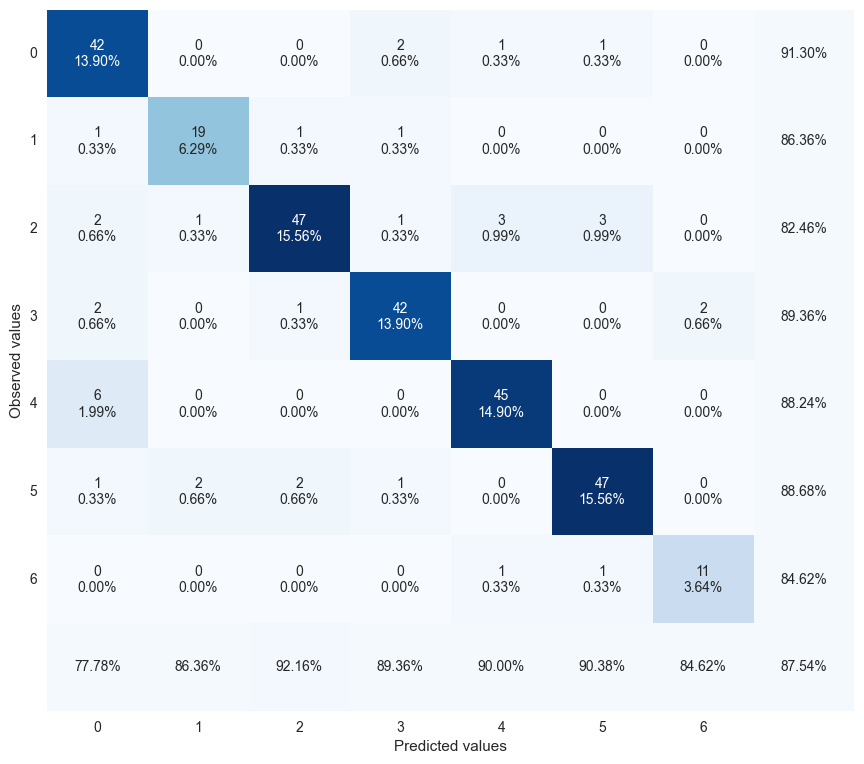

In [16]:
# 绘制混淆矩阵的可视化图表。
classifier.plot_confusion_matrix()

In [17]:
# 查看模型在训练集上的混淆矩阵。
classifier.confusion_matrix(test=False)

Predicted values                                           \
                                 0      1      2      3      4      5     6   
Observed values 0            207.0    0.0    0.0    0.0    0.0    0.0   0.0   
                1              0.0  105.0    0.0    0.0    0.0    0.0   0.0   
                2              0.0    0.0  227.0    0.0    0.0    0.0   0.0   
                3              0.0    0.0    0.0  162.0    0.0    0.0   0.0   
                4              0.0    0.0    0.0    0.0  207.0    0.0   0.0   
                5              0.0    0.0    0.0    0.0    0.0  199.0   0.0   
                6              0.0    0.0    0.0    0.0    0.0    0.0  49.0   
precision                      1.0    1.0    1.0    1.0    1.0    1.0   1.0   

                  recall  
                          
Observed values 0    1.0  
                1    1.0  
                2    1.0  
                3    1.0  
                4    1.0  
                5    1.0  
                6    1.0  
precision            1.0

In [18]:
# 查看分类报告，包括精确率（precision）、召回率（recall）和 F1 分数。
classifier.classification_report()

,precision,recall,f1-score,support
0,0.777778,0.913043,0.840000,46.000000
1,0.863636,0.863636,0.863636,22.000000
2,0.921569,0.824561,0.870370,57.000000
3,0.893617,0.893617,0.893617,47.000000
4,0.900000,0.882353,0.891089,51.000000
5,0.903846,0.886792,0.895238,53.000000
6,0.846154,0.846154,0.846154,13.000000
accuracy,0.875433,0.875433,0.875433,0.875433
macro avg,0.872371,0.872880,0.871444,289.000000
weighted avg,0.879277,0.875433,0.875932,289.000000


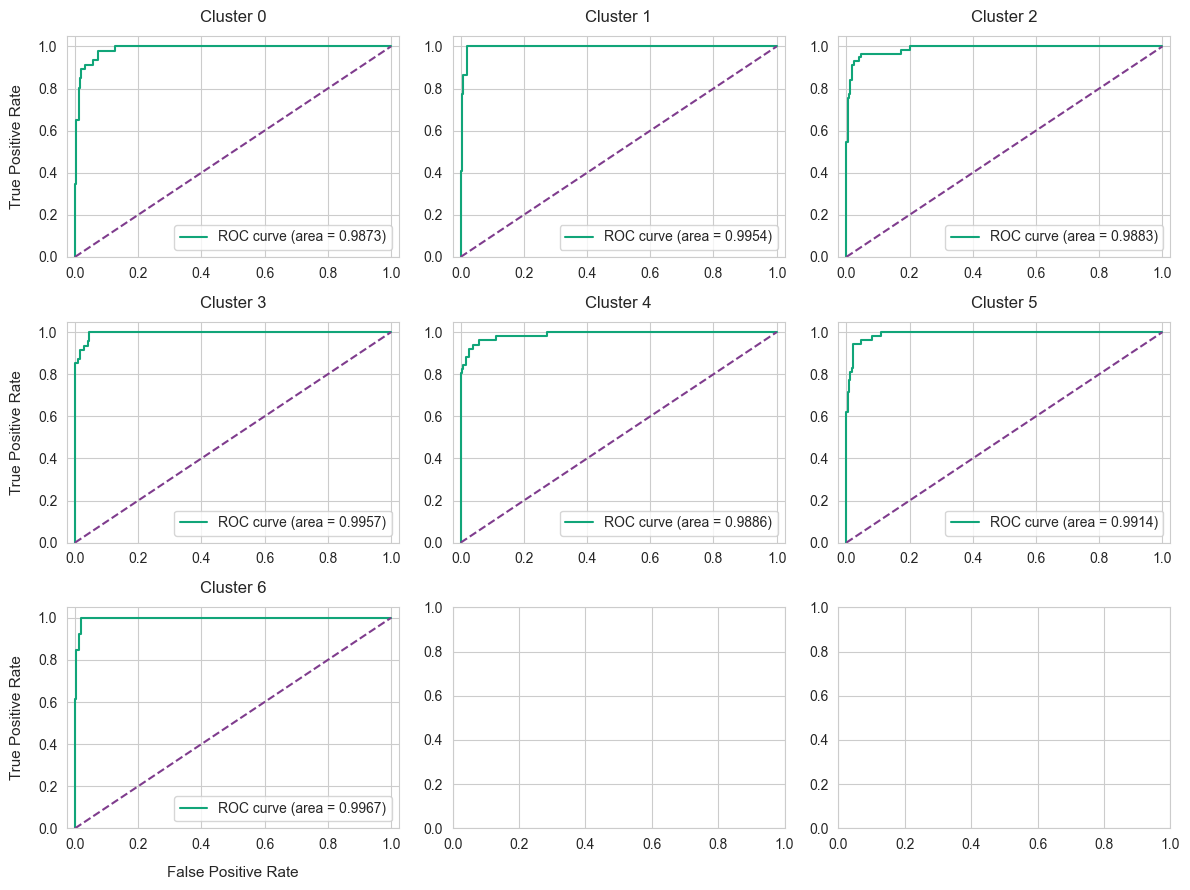

In [19]:
# 绘制模型的 ROC 曲线，评估分类性能
classifier.plot_roc_curves()

### 2.3. Model explainability 模型可解释性

#### 2.3.1. Global feature importance 全局特征重要性

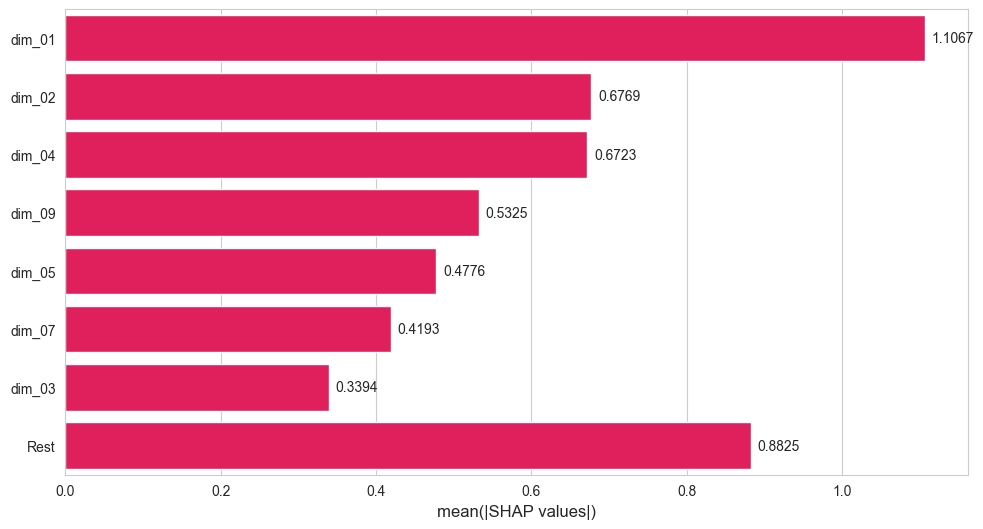

In [20]:
# 使用 SHAP（SHapley Additive exPlanations）方法绘制全局特征重要性。
classifier.plot_shap_importances()

#### 2.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性。

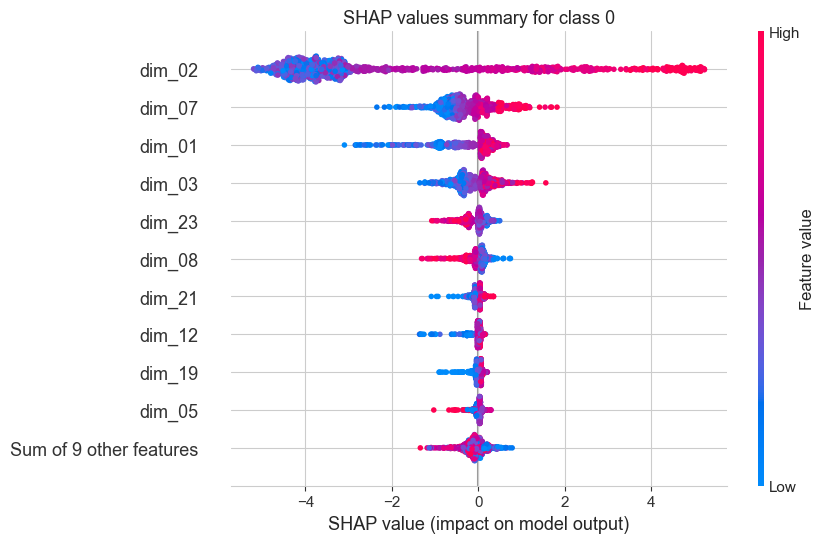

In [21]:
classifier.plot_shap_importances_beeswarm(class_id=0)

绘制类别 0 的特征重要性...


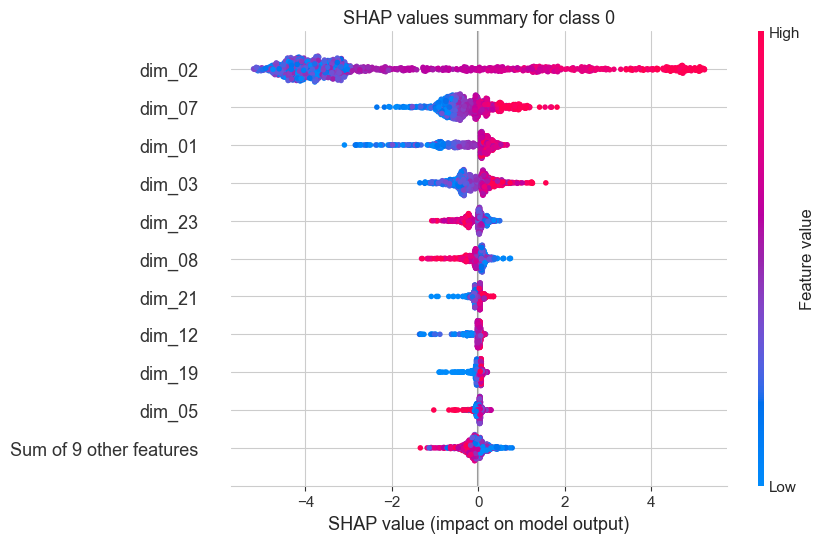

绘制类别 1 的特征重要性...


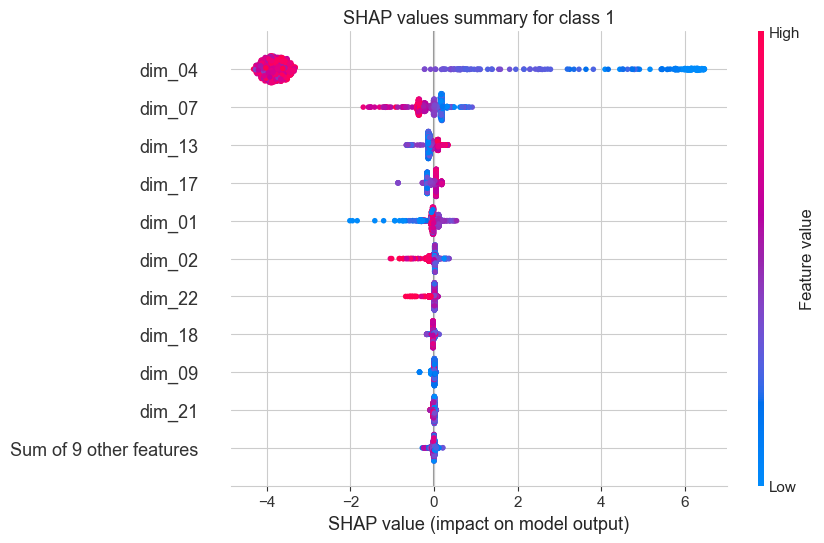

绘制类别 2 的特征重要性...


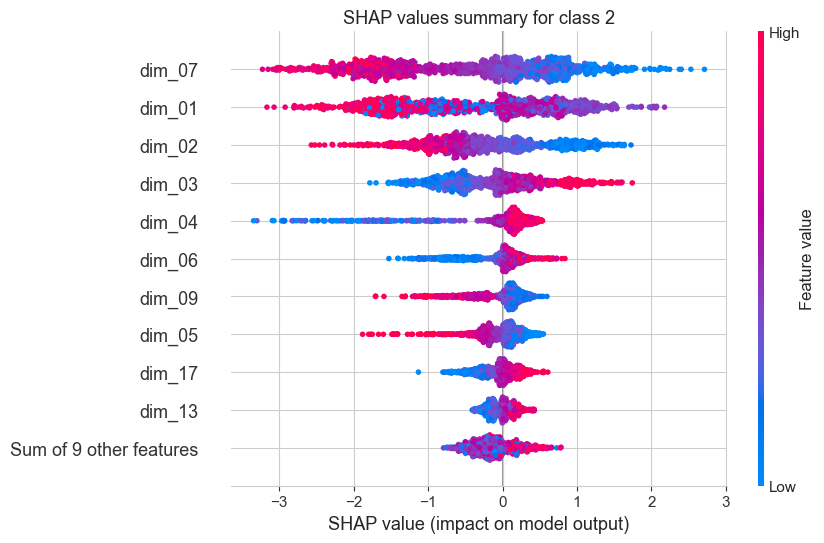

绘制类别 3 的特征重要性...


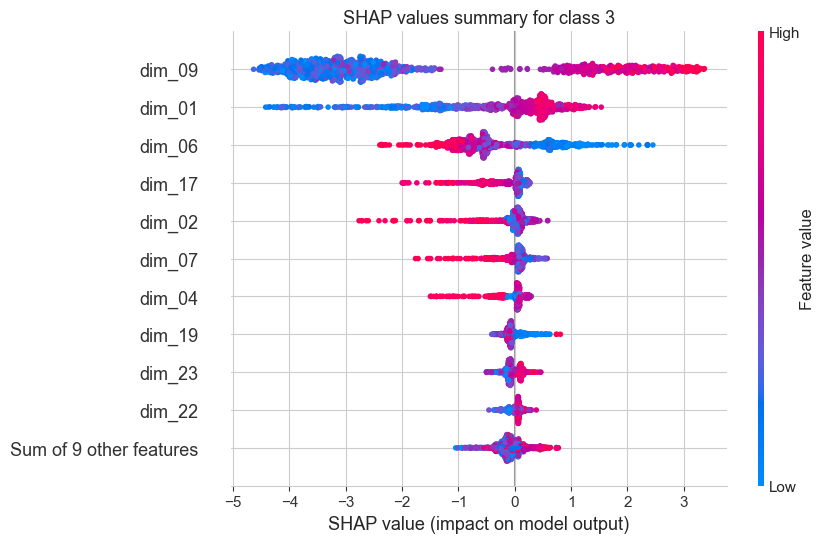

绘制类别 4 的特征重要性...


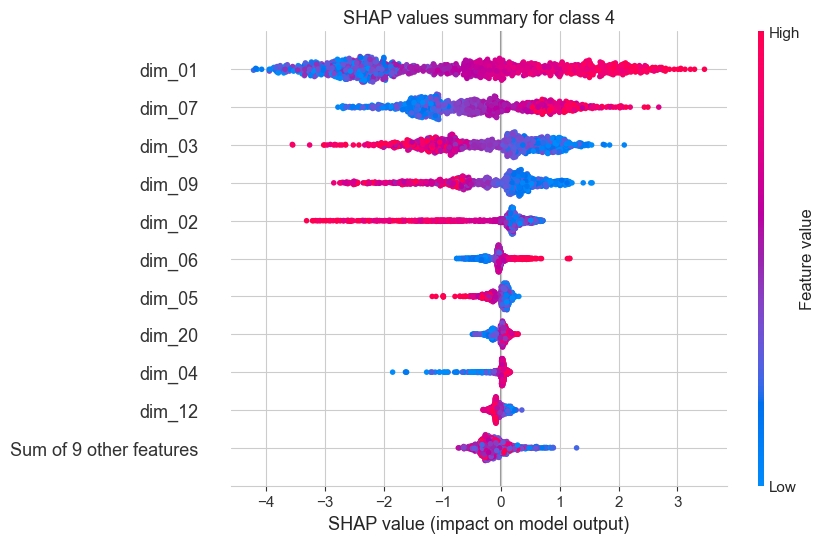

绘制类别 5 的特征重要性...


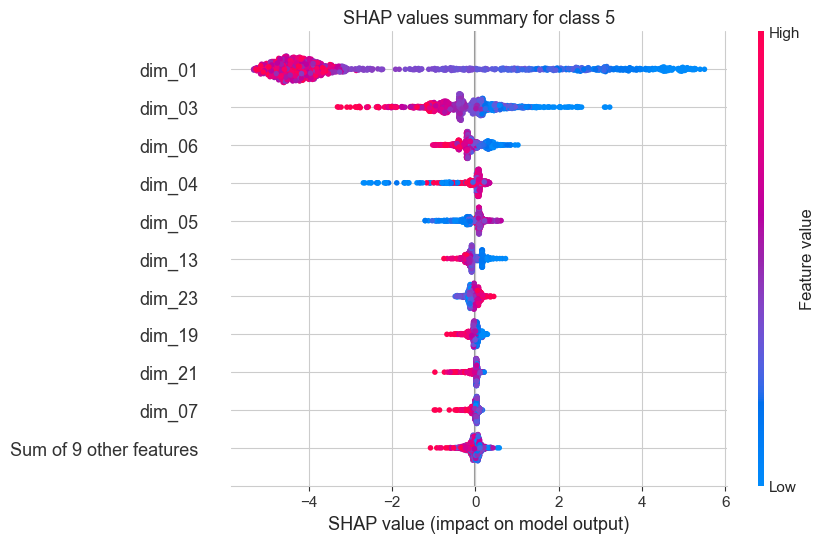

绘制类别 6 的特征重要性...


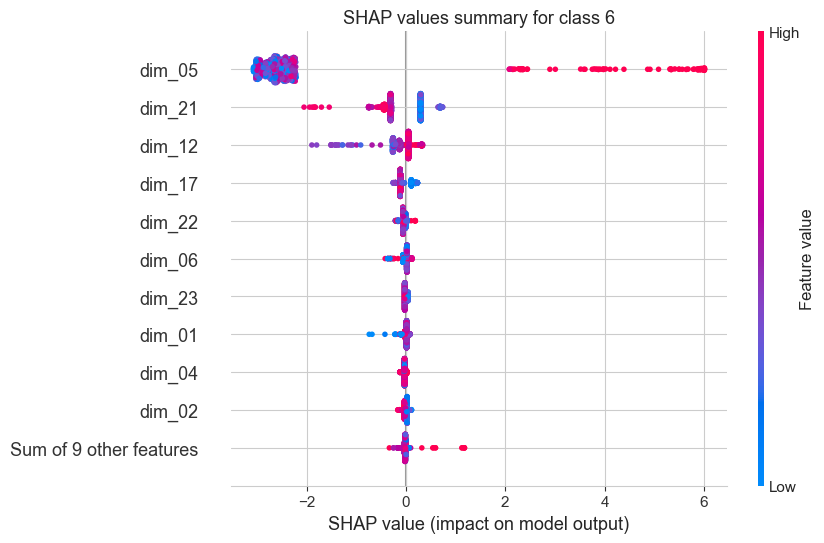

In [22]:
# 使用 SHAP 方法绘制指定类别（如 class_id=0）的特征重要性。
# 获取所有类别的唯一值
from matplotlib import pyplot as plt
all_classes = df_red['cluster'].unique()

# 按顺序绘制特征重要性
for class_id in sorted(all_classes):
    print(f"绘制类别 {class_id} 的特征重要性...")
    classifier.plot_shap_importances_beeswarm(class_id=class_id)
    plt.show()  # 确保每个图表单独显示
    

## Reproduciblity check 可重复性检查。

In [23]:
# 导出预测结果 使用训练好的模型对数据进行预测，并将结果保存到 CSV 文件中。
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data_TWN/data_台湾_modified_dimred_vars_classification_output.csv', index=False)

In [24]:
# 比较预测结果 加载参考结果，并与当前结果进行比较，检查维度和预测是否一致。
df_ref = pd.read_csv('data_TWN/data_台湾_modified_dimred_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0


## 3. Classification using the original variables as predictors

使用原始变量作为预测因子进行分类。

First, we separate numerical from categorical variables.

首先，我们将数值变量与分类变量区分开来。

In [25]:
num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH03F', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', 'ASBH18CB', 'ASBH18DA', 'ASBH18DB', 'ASBH18EA', 'ASBH18EB', 'ASBH18FA', 'ASBH18FB', 'ASBH19', 'ASBH20A', 'ASBH20B', 'ASBH20C', 'ASBH21A', 'ASBH21B', 'ASBH21C', 'ASBH21D', 'ASBH22', 'ASDGHRL', 'ASDHSES', 'ASDHELA', 'ASDHENA', 'ASDHELN', 'ASDHELT', 'ASDHPCS', 'ASDHPLR', 'ASDHAPS', 'ASDHEDUP', 'ASDHOCCP', 'ACBG04', 'ACBG05A', 'ACBG05B', 'ACBG07A', 'ACBG07B', 'ACBG07C', 'ACBG08', 'ACBG13', 'ACBG14C', 'ACBG14D', 'ACBG14E', 'ACBG14F', 'ACBG14G', 'ACBG14H', 'ACBG14I', 'ACBG14J', 'ACBG14K', 'ACBG14L', 'ACBG14M', 'ACBG14N', 'ACBG17', 'ACBG18A', 'ACBG18B', 'ACBG18C', 'ACBG19', 'ACBG20', 'ACBG21A', 'ACBG21B', 'ACBG21C', 'ACBG21D', 'ACBG21E', 'ACBG21F', 'ACDGRRS', 'ACDGEAS', 'ACDGDAS', 'ACDGSBC', 'ATBG02', 'ATBG03', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

### 3.1. Class instantiation and model fitting 类实例化和模型拟合

In [26]:

# 使用原始数据初始化分类器。
classifier = Classifier(df, list(df.columns[:-2]),  df['cluster'], num_cols=num_vars, cat_cols=cat_vars)

In [27]:
np.random.seed(42)

In [28]:

# 数值变量	ATBGEAS	    学校强调学术成功-教师/量表
# 分类变量	ATDGEAS	    学校强调学术成功-教师/指数
# 数值变量	ATBGSOS	    安全有序学校-教师/量表
# 分类变量	ATDGSOS	    安全有序学校-教师/指数
# 数值变量	ATBGTJS	    教师工作满意度/量表
# 分类变量	ATDGTJS	    教师工作满意度/指数
# 数值变量	ATBGSLI	    教学因学生未准备好受限/量表
# 分类变量	ATDGSLI	    教学因学生未准备好受限/指数
# 数值变量	ATDGLIHY    每年语言教学小时数
# 数值变量	ATDGRIHY	每年阅读教学小时数


# ['ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
# ['ATDGEAS', 'ATDGSOS','ATDGTJS',  'ATDGSLI']
# ['ATBGEAS', 'ATDGEAS','ATBGSOS', 'ATDGSOS','ATBGTJS','ATDGTJS', 'ATBGSLI', 'ATDGSLI','ATDGLIHY', 'ATDGRIHY']

# 使用指定的特征训练分类模型，并进行超参数调优。
classifier.train_model(features_to_keep=[
    "ASRREA",
    # "ASDGSEC", "ASDGSSB", "ASDGSB", "ASDGERL","ASDGDRL", "ASDGSLR", "ASDGSCR", 
    "ASBGSEC", "ASBGSSB", "ASBGSB", "ASBGERL", "ASBGDRL", "ASBGSLR", "ASBGSCR",
# "ASDG05S", 
    # "ASDGHRL", "ASDHSES", 
    "ASBGHRL", "ASBHSES",
# "ASDHELA", "ASDHENA",
# "ASBHELA", "ASBHENA",
    # "ASDHELN",
    "ASBHELN",
    # "ASDHELT","ASDHPCS", "ASDHPLR",
    "ASBHELT", "ASBHPCS", "ASBHPLR",
    "ASDHAPS", 
# "ASDHEDUP", "ASDHOCCP", 
    # "ACDGRRS", "ACDGEAS", "ACDGDAS", "ACDGSBC", "ATDGEAS", "ATDGSOS", "ATDGTJS", "ATDGSLI",
    "ACBGRRS", "ACBGEAS", "ACBGDAS", "ACDGTIHY","ATBGEAS", "ATBGSOS", "ATBGTJS", "ATBGSLI", 
    "ATDGLIHY", "ATDGRIHY"
    ],
    hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7, 9]))

2025-04-28 04:51:53 INFO     clearn.classifier.classifier: Running feature selection...
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Ro

In [29]:

# classifier.feature_importances

# 获取五个最重要特征的全局特征重要性 打印特征重要性
# Get global feature importance of the five most important features
print("前几个最重要特征的全局特征重要性:\n", classifier.feature_importances.head(10))
# 获取最重要特征的全局特征重要性 打印特征重要性，保存结果
classifier.feature_importances.to_csv('data_TWN/data_台湾_modified_全局特征重要性.csv', index=False)
print("已完成，全局特征重要性，结果保存。")

前几个最重要特征的全局特征重要性:
   variable_name  shap_importance
0        ASRREA         0.999671
1       ASBHELN         0.583672
2       ATBR01A         0.553793
3       ATBR02B         0.412466
4       ACBGRRS         0.276404
5       ASBHSES         0.258087
6      ATDGRIHY         0.189125
7       ASBGERL         0.177322
8       ASBGHRL         0.164873
9       ATBGSOS         0.125175
已完成，全局特征重要性，结果保存。


In [30]:
# "筛选后的特征数量:"
# len(classifier.filtered_features_)
# 查看经过特征选择后保留的特征数量。
print("筛选后的特征数量:", len(classifier.filtered_features_), "\n筛选后的特征:", classifier.filtered_features_)


筛选后的特征数量: 71 
筛选后的特征: [np.str_('ASDAGE'), np.str_('ASRREA'), np.str_('ASBGSEC'), np.str_('ASBGSSB'), np.str_('ASBGSB'), np.str_('ASBGERL'), np.str_('ASBGDRL'), np.str_('ASBGSLR'), np.str_('ASBGSCR'), np.str_('ASBGHRL'), np.str_('ASBHSES'), np.str_('ASBHELN'), np.str_('ASBHELT'), np.str_('ASBHPCS'), np.str_('ASBHPLR'), np.str_('ACBG09'), np.str_('ACBG15'), np.str_('ACBG16'), np.str_('ACBGRRS'), np.str_('ACBGEAS'), np.str_('ACBGDAS'), np.str_('ACDGTIHY'), np.str_('ATBG01'), np.str_('ATBR01A'), np.str_('ATBR01B'), np.str_('ATBR02A'), np.str_('ATBR02B'), np.str_('ATBGEAS'), np.str_('ATBGSOS'), np.str_('ATBGTJS'), np.str_('ATBGSLI'), np.str_('ATDGLIHY'), np.str_('ATDGRIHY'), np.str_('ASBH16'), np.str_('ACBG14F'), np.str_('ACBG14G'), np.str_('ACBG14K'), np.str_('ACBG14M'), np.str_('ACBG14N'), np.str_('ACBG20'), np.str_('ACBG21B'), np.str_('ACBG21C'), np.str_('ACBG21F'), np.str_('ATBG05BE'), np.str_('ATBG05BJ'), np.str_('ATBG07BC'), np.str_('ATBG07BF'), np.str_('ATBG08B'), np.str_('ATBG09A'),

### 3.2. Model performance 模型性能

In [31]:
# 与降维数据的分类类似，使用相同的方法评估模型性能并分析特征重要性
# classifier.hyperparameter_tuning_metrics()

print("超参数调优结果:\n", classifier.hyperparameter_tuning_metrics()) # 打印超参数调优结果
# 查看模型超参数调优结果。保存结果
classifier.confusion_matrix().to_csv('data_TWN/data_台湾_modified_超参数调优结果.csv', index=False)
print("已完成，模型超参数调优结果，结果保存。")

超参数调优结果:
    XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.820923   
1                           0.15         3           60            0.823513   
2                           0.15         5           30            0.829581   
3                           0.15         5           60            0.835628   
4                           0.15         7           30            0.820070   
5                           0.15         7           60            0.834769   
6                           0.15         9           30            0.825250   
7                           0.15         9           60            0.833033   
8                           0.25         3           30            0.826113   
9                           0.25         3           60            0.837357   
10                          0.25         5

In [32]:
# 查看训练好的模型对象。
print("训练好的模型对象:\n", classifier.model_) # 打印训练好的模型对象

# 查看训练好的模型对象的参数。
print("训练好的模型对象的参数:\n", classifier.model_.get_params()) # 打印训练好的模型对象的参数


训练好的模型对象:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)
训练好的模型对象的参数:
 {'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categori

In [33]:


# 查看模型在测试集上的混淆矩阵。
print("模型在测试集上的混淆矩阵\n", classifier.confusion_matrix())
# 查看模型在测试集上的混淆矩阵。保存结果
classifier.confusion_matrix().to_csv('data_TWN/data_台湾_modified_模型在测试集上的混淆矩阵.csv', index=False)
print("已完成，模型在测试集上的混淆矩阵，结果保存。")



模型在测试集上的混淆矩阵
                   Predicted values                                          \
                                 0          1      2          3          4   
Observed values 0        42.000000   0.000000   0.00   2.000000   0.000000   
                1         0.000000  21.000000   0.00   0.000000   0.000000   
                2         1.000000   1.000000  46.00   1.000000   4.000000   
                3         2.000000   0.000000   0.00  41.000000   1.000000   
                4         4.000000   0.000000   2.00   0.000000  45.000000   
                5         0.000000   1.000000   2.00   0.000000   0.000000   
                6         0.000000   0.000000   0.00   0.000000   1.000000   
precision                 0.857143   0.913043   0.92   0.931818   0.882353   

                                       recall  
                           5      6            
Observed values 0   2.000000   0.00  0.913043  
                1   1.000000   0.00  0.954545  
             

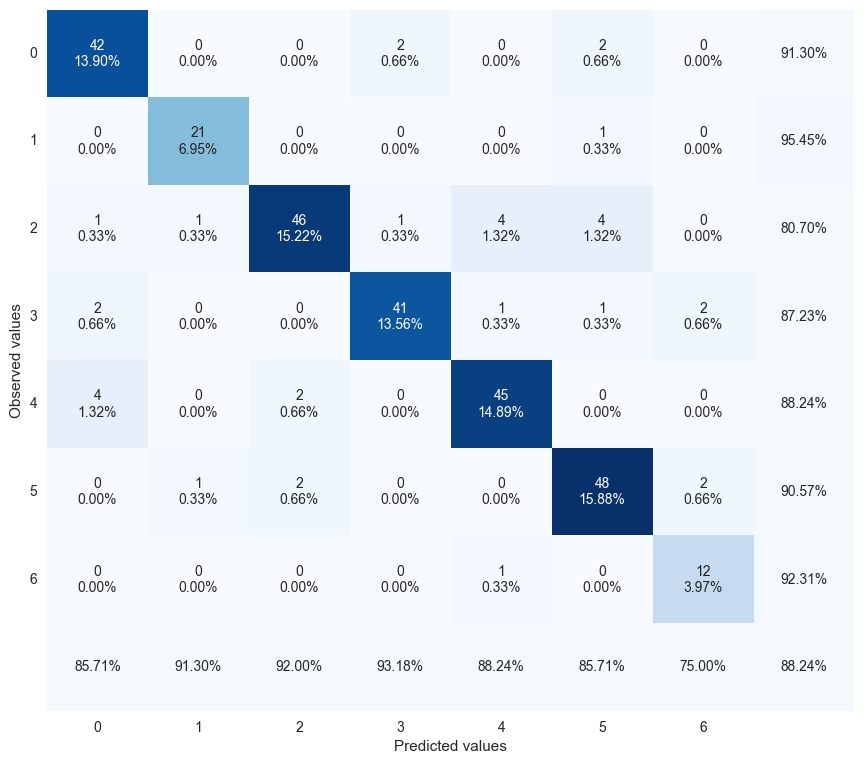

In [34]:
classifier.plot_confusion_matrix()

In [35]:
# classifier.confusion_matrix()
# test:默认=True,如果为True，返回在测试集上计算的混淆矩阵。如果为False，返回在训练集上的混淆矩阵。
# 查看模型在训练集上的混淆矩阵。
print("模型在训练集上的混淆矩阵\n", classifier.confusion_matrix(test=False))
# 查看模型在训练集上的混淆矩阵。保存结果
classifier.confusion_matrix(test=False).to_csv('data_TWN/data_台湾_modified_模型在训练集上的混淆矩阵.csv', index=False)
print("已完成，模型在训练集上的混淆矩阵，结果保存。")

# classifier.confusion_matrix(test=False)



模型在训练集上的混淆矩阵
                   Predicted values                                           \
                                 0      1      2      3      4      5     6   
Observed values 0            207.0    0.0    0.0    0.0    0.0    0.0   0.0   
                1              0.0  105.0    0.0    0.0    0.0    0.0   0.0   
                2              0.0    0.0  227.0    0.0    0.0    0.0   0.0   
                3              0.0    0.0    0.0  162.0    0.0    0.0   0.0   
                4              0.0    0.0    0.0    0.0  207.0    0.0   0.0   
                5              0.0    0.0    0.0    0.0    0.0  199.0   0.0   
                6              0.0    0.0    0.0    0.0    0.0    0.0  49.0   
precision                      1.0    1.0    1.0    1.0    1.0    1.0   1.0   

                  recall  
                          
Observed values 0    1.0  
                1    1.0  
                2    1.0  
                3    1.0  
                4    1.0  
      

In [36]:
# classifier.classification_report()

# Classification report # # 打印分类报告 包括精确率（precision）、召回率（recall）和 F1 分数，support 列表示每个类别的样本数量（总样本数）
print("分类报告:\n", classifier.classification_report())
# 查看模型分类报告。保存结果
classifier.classification_report().to_csv('data_TWN/data_台湾_modified_分类报告.csv', index=False)
print("已完成，模型分类报告，结果保存。")

分类报告:
               precision    recall  f1-score     support
0              0.857143  0.913043  0.884211   46.000000
1              0.913043  0.954545  0.933333   22.000000
2              0.920000  0.807018  0.859813   57.000000
3              0.931818  0.872340  0.901099   47.000000
4              0.882353  0.882353  0.882353   51.000000
5              0.857143  0.905660  0.880734   53.000000
6              0.750000  0.923077  0.827586   13.000000
accuracy       0.882353  0.882353  0.882353    0.882353
macro avg      0.873071  0.894005  0.881304  289.000000
weighted avg   0.885569  0.882353  0.882372  289.000000
已完成，模型分类报告，结果保存。


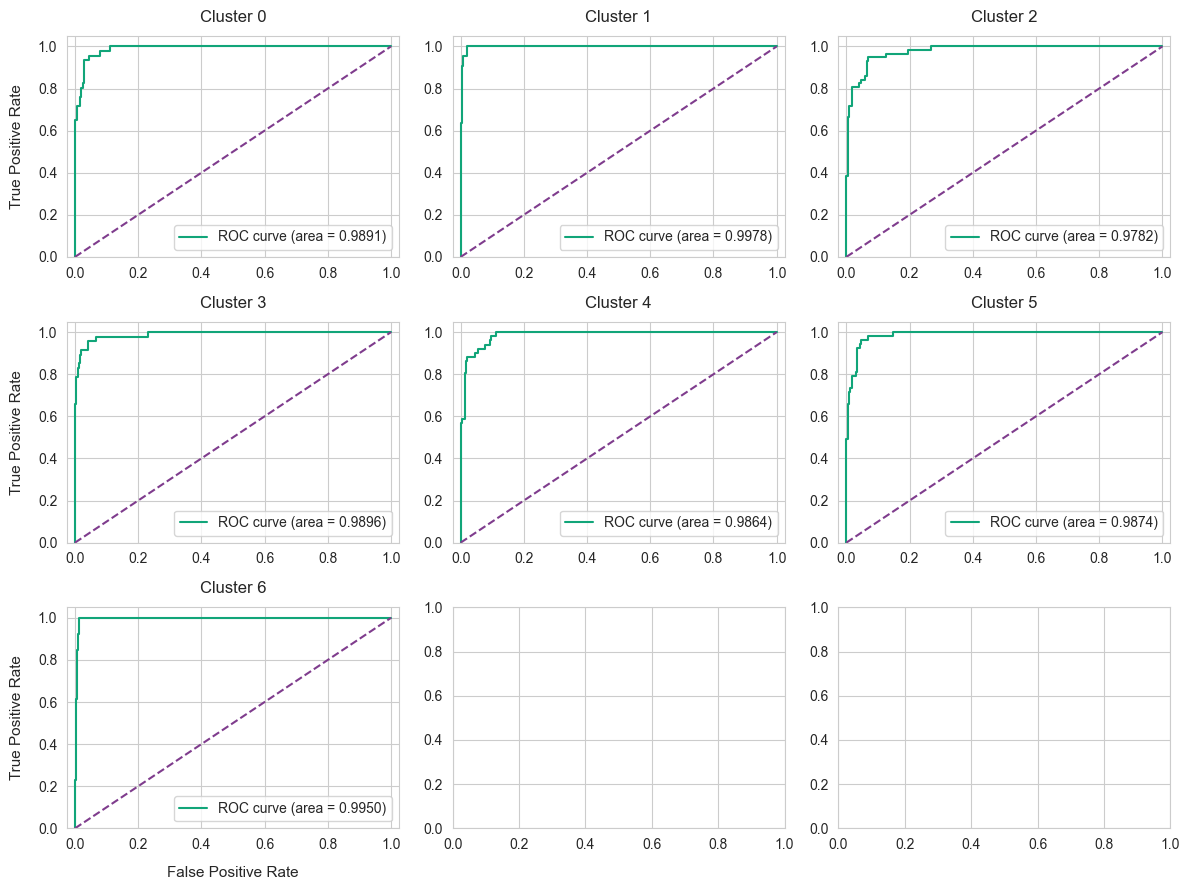

In [37]:
classifier.plot_roc_curves() # ROC curves # ROC 曲线 评估分类性能

### 3.3. Model explainability 模型可解释性

#### 3.3.1. Global feature importance 全局特征重要性

In [38]:
# Get global feature importance of the five most important features
print("前几个最重要特征的全局特征重要性:\n", classifier.feature_importances.head(10))
# 获取最重要特征的全局特征重要性 打印特征重要性，保存结果
classifier.feature_importances.to_csv('data_TWN/data_台湾_modified_全局特征重要性.csv', index=False)
print("已完成，全局特征重要性，结果保存。")

前几个最重要特征的全局特征重要性:
   variable_name  shap_importance
0        ASRREA         0.999671
1       ASBHELN         0.583672
2       ATBR01A         0.553793
3       ATBR02B         0.412466
4       ACBGRRS         0.276404
5       ASBHSES         0.258087
6      ATDGRIHY         0.189125
7       ASBGERL         0.177322
8       ASBGHRL         0.164873
9       ATBGSOS         0.125175
已完成，全局特征重要性，结果保存。


已完成全局特征重要性图生成


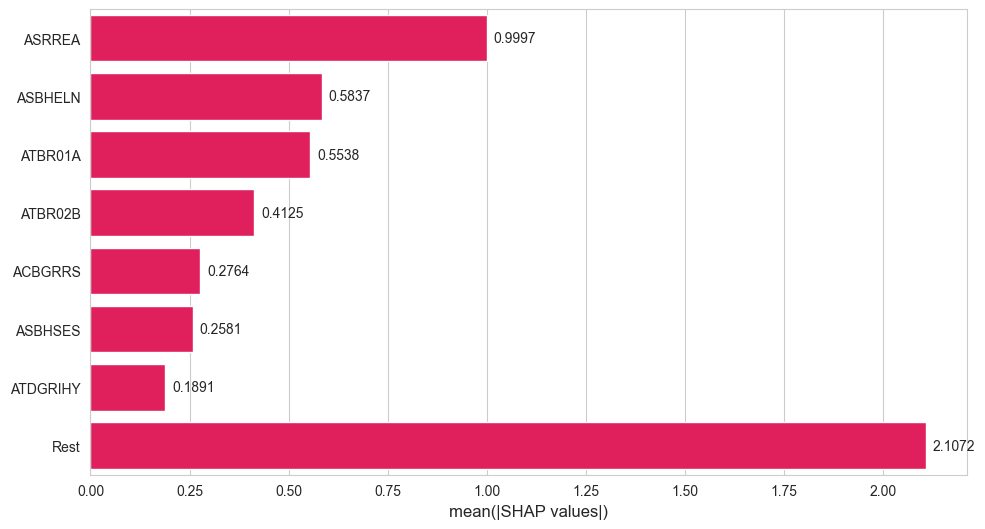

In [39]:
classifier.plot_shap_importances()

# classifier.plot_shap_importances(output_path=os.path.join("img_MAC", "全局特征重要性图classifier_global_feature_importance.jpg"))
# plt.clf()
print("已完成全局特征重要性图生成")

#### 3.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性

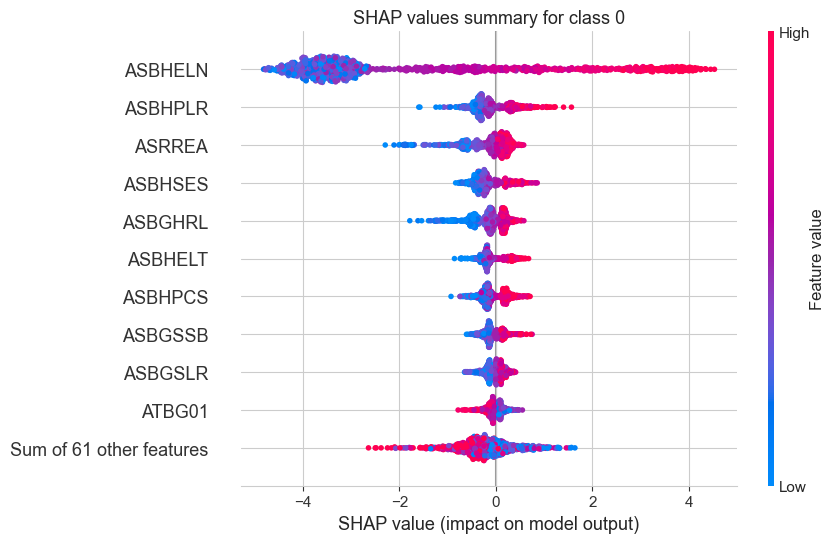

In [40]:
classifier.plot_shap_importances_beeswarm(class_id=0) #, output_path='PATH.jpg')

绘制类别 0 的特征重要性...


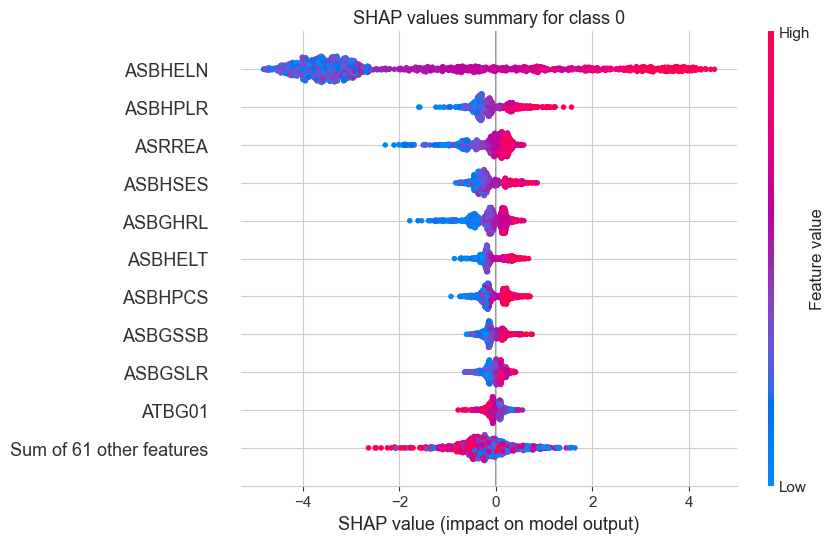

绘制类别 1 的特征重要性...


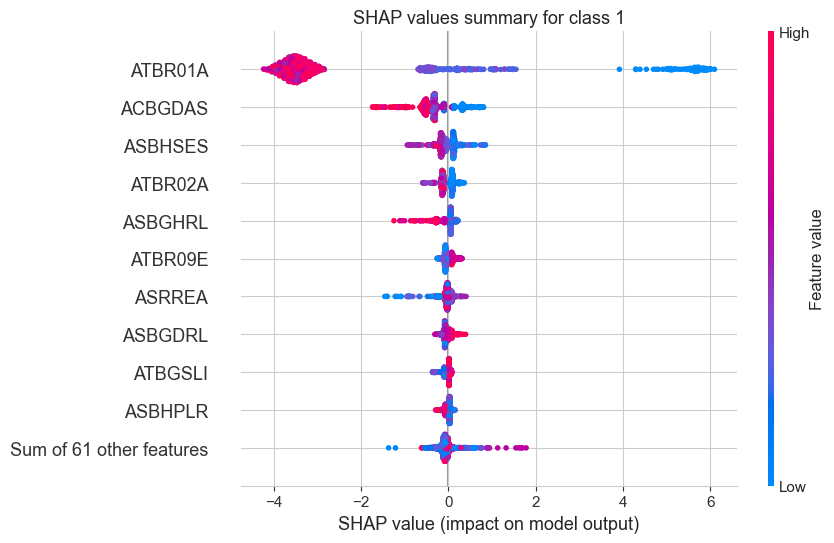

绘制类别 2 的特征重要性...


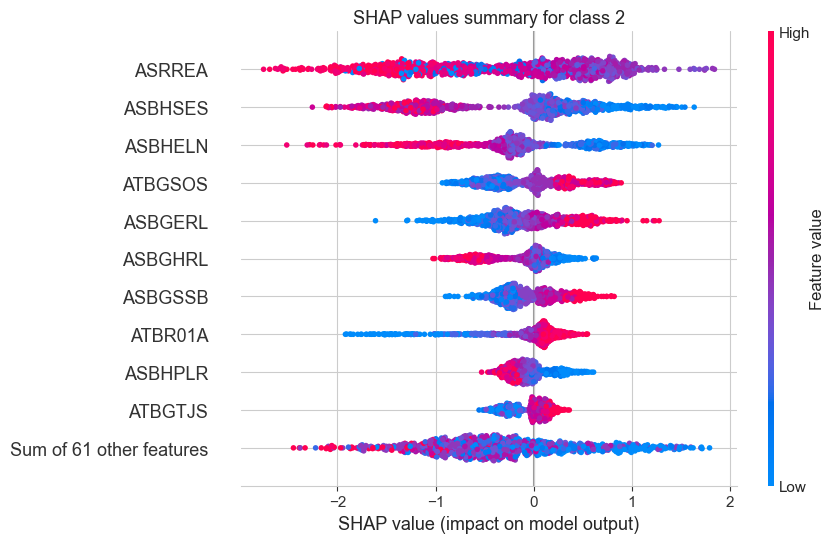

绘制类别 3 的特征重要性...


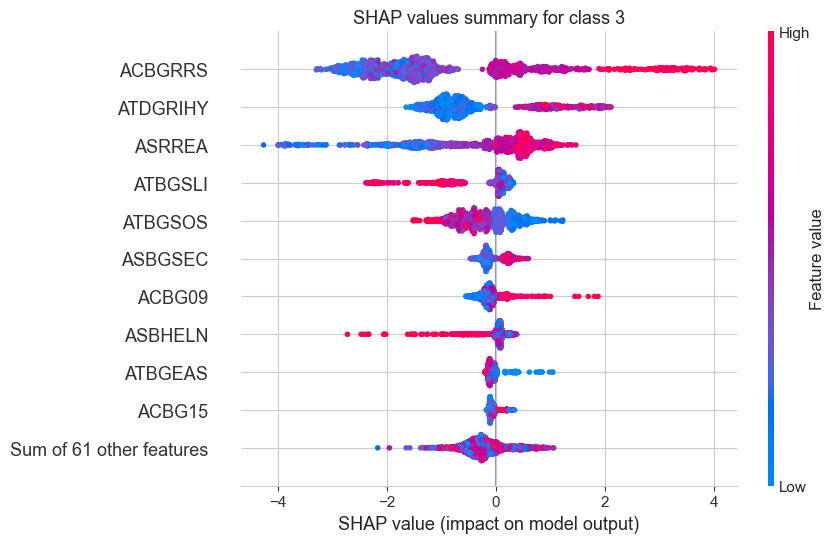

绘制类别 4 的特征重要性...


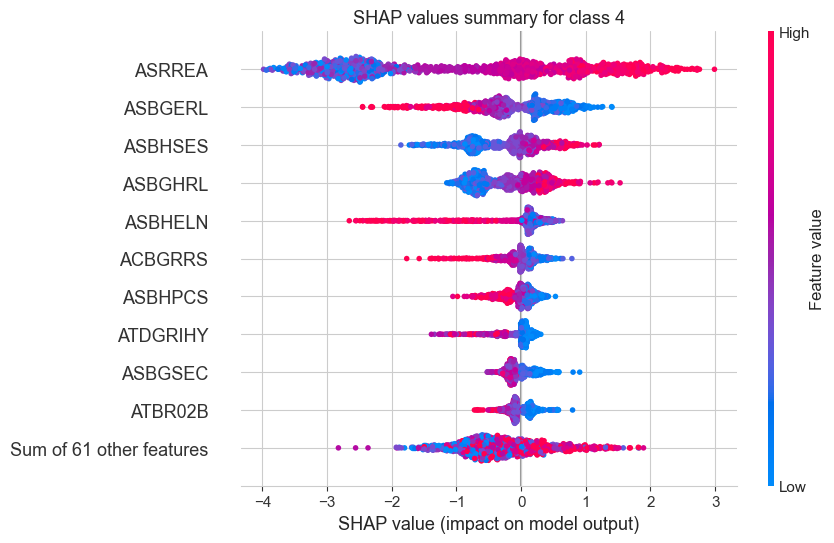

绘制类别 5 的特征重要性...


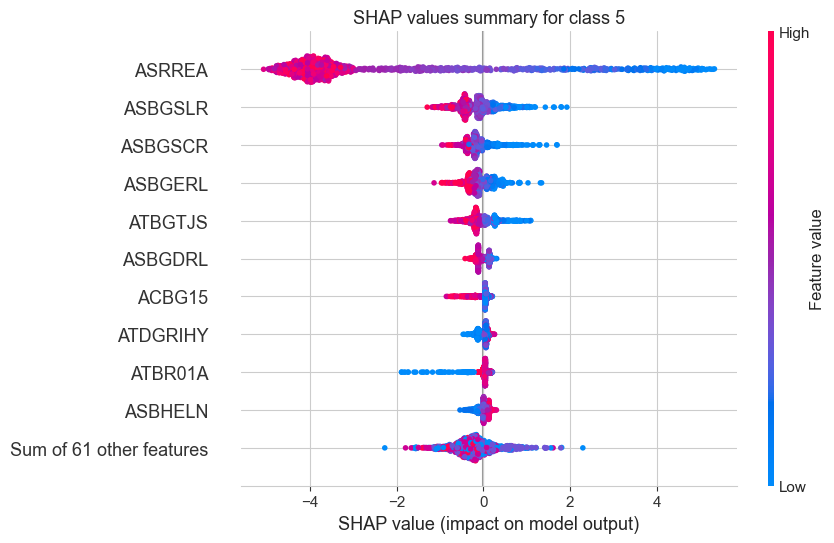

绘制类别 6 的特征重要性...


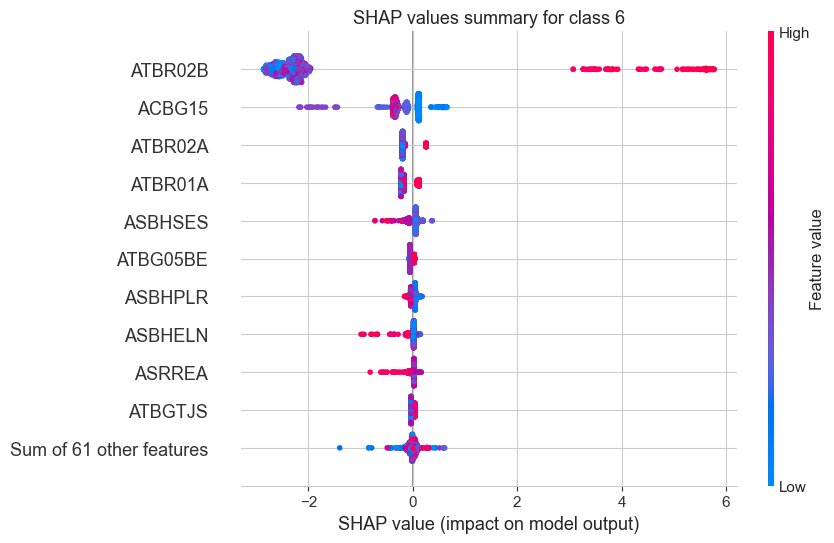

In [41]:
# 使用 SHAP 方法绘制指定类别（如 class_id=0）的特征重要性。
# 获取所有类别的唯一值
from matplotlib import pyplot as plt
all_classes = df['cluster'].unique()

# 按顺序绘制特征重要性
for class_id in sorted(all_classes):
    print(f"绘制类别 {class_id} 的特征重要性...")
    classifier.plot_shap_importances_beeswarm(class_id=class_id)
    plt.show()  # 确保每个图表单独显示
    

## Repreoducibility check 可重复性检查

In [42]:
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data_TWN/data_台湾_modified_original_vars_classification_output.csv', index=False)

In [43]:
df_ref = pd.read_csv('data_TWN/data_台湾_modified_original_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0
